In [ ]:

from random import random
from time import sleep
from matplotlib import pyplot
from math import fabs
import numpy as np
from os.path import isfile
def convert(image):
    result =list() #вся картинка
    for id_string in range (0,256,8) :
        for id_column in range (0,256,8):
            temp=list()
            for string in image[id_string:id_string+8]:
                temp1=list()#формирование cтроки пикселей
                for pixel in string[id_column:id_column+8]:
                    temp2=list()#формирование пикселей пиксели
                    for el in pixel[:3]:
                        temp2.append(el)
                    temp1.append(temp2)
                temp.append(temp1)  
            result.append(temp)
    return result

def reconvert(pict):
    picture=list()
    for string in pict[0]:
        picture.append(string)
    i=1
    while 1024 > i:
        j=0
        for string in pict[i]:
            j+=1
            if i%32==0:
                picture.append(string)
            else:
                for el in string:
                    picture[(i//32)*8+j%8].append(el)
        i= i+1
    return  picture
            
        
        
class Neural_network():
    def __init__(self,n:int):
        self.__n=n
        self.__numb_picture=2
        
        
        
    def train(self):
        image =list(pyplot.imread("dataset/"+str(self.__numb_picture)+".png"))
        self.blocks_im = convert(image) 
        self.__count=0
        self.big_picture=list()
        for block in self.blocks_im:
            #pyplot.subplot(32,32,count)
            self.__count+=1
            ls=self.start(self.converting(block),2)
            
            self.big_picture.append(self.reconverting(ls))
            #pyplot.imshow(bl)
            print( self.__count)
            #self.start(self.converting(block))
        itog=reconvert(self.big_picture)
        pyplot.imshow(itog)

    def converting(self,block):
        ls=list()
        for string in block:
            for pix in string:
                for cl in pix:
                    ls.append(cl*2-1)
        return ls

    def reconverting(self,vector:list):
        matrix=list()
        px=list()
        string=list()
        size= len(vector)
        for index in range(size):
            px.append((vector[index]+1)/2)
            if (index+1)%3==0:
                string.append(px)
                px=[]
            if (index+1)%(3*8)==0:
                matrix.append(string)
                string=[]
        return matrix


    def summary(self,vector,matrix):
        new_vector=list()
        if len(matrix[0])!=len(vector):
            return None
        for string in matrix:
            temp=0
            for index in range(len(vector)):
                temp+=vector[index]*string[index]
            new_vector.append(temp)
        return new_vector

    def check(self,vector):
        new_vector=list()
        for el in vector:
            if el >1:
                new_vector.append(1.)
            elif el <-1:
                new_vector.append(-1.)
            else:
                new_vector.append(el)
        return new_vector
                

    def start(self,x:list,miss_your):
        matrix=list()
        path1="./matrix/matrix4_"+str(self.__count)
        path2="./matrix/t_matrix4_"+str(self.__count)
        trans_matrix = list()
        if(not isfile(path1+".npy")):    
            for number in range(self.__n):
                temp=list()
                for number_px in range(64*3):
                    temp.append(random()*2-1)
                matrix.append(temp)
            for el in matrix[0]:
                trans_matrix.append([el])
            for string in matrix[1:]: 
                for index in range(len(string)):
                    trans_matrix[index].append(string[index])
        else:
            matrix=np.load(path1+".npy").tolist()
            trans_matrix=np.load(path2+".npy").tolist()
        miss=miss_your+1
        miss_v=[]
        y=list()

        alfa =0.0017
        
        flag=False
        x1=list()
        while miss_your < fabs(miss):
            if flag:
                trans_matrix= self.diff_matrix(trans_matrix,self.multiplying(alfa,miss_v,x1))
                matrix=self.diff_matrix(matrix,self.mult_m(matrix,self.multiplying(alfa,x,miss_v)))
            else:
                flag=True
            x1 = self.summary(x,matrix)
            y = self.summary(x1,trans_matrix)
   
            y = self.check(y)
            miss_v=self.difference(x,y)
            miss= sum(miss_v)
            print(miss) 
           
            
        
        self.save(path1,matrix) 
        self.save(path2,trans_matrix)
        
        return y 

    def save(self,path,matrix):
        np.save(path,matrix)#function to save weights

    def diff_matrix(self,matrix1,matrix2):
        matr=list()
        for index_str in range(len(matrix1)):
            temp=list()
            for index_el in range(len(matrix1[index_str])):
                temp.append(matrix1[index_str][index_el]+matrix2[index_str][index_el])
            matr.append(temp) 
        return matr        


    def difference(self,vector1,vector2):
        new_vector=list()
        for index in range(len(vector1)):
            new_vector.append(vector1[index]-vector2[index])
        return new_vector
    

    def multiplying(self,alfa,v1,v2):
        matrix= list()
        for el1 in v1:
            string=list()
            for el2 in v2:
                string.append(alfa*el1*el2)
            matrix.append(string)
        return matrix


    def mult_m(self,matrix1,matrix2):
        matr=list()
        for el in range(len(matrix1)):
            string= list()
            for el1 in range(len(matrix2)):
                summury=0
                for el2 in range(len(matrix2[el1])):
                    summury+=matrix1[el][el2]*matrix2[el2][el1]
                string.append(summury)
            matr.append(string)
        return matr
 
    


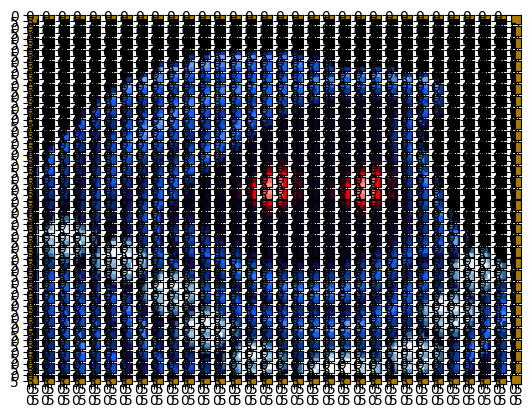

In [6]:
image =list(pyplot.imread("dataset/2.png"))
blocks_im = convert(image) 
count=1
big_picture=list()
for block in blocks_im:
    pyplot.subplot(32,32,count)
    count+=1
    #print(count)
    pyplot.imshow(block)


In [43]:
def main():
    nn = Neural_network(3)
    nn.train()
main()

-0.00069774229276931
1
-0.10876723334266994
2
-0.13887559218970488
3
0.03682408681397831
4
0.1314884189915754
5
-0.06485749550626341
6
0.10247119511245512
7
-0.045529103584845854
8
0.09865569100624727
9
0.08151390342906928
10
-0.13878281712971186
11
-0.04999487513087886
12
-0.10167377860343985
13
-0.09175714619320954
14
-0.08001135817806962
15
-0.10076575787299183
16
0.12761418509526268
17
-0.14275230309891734
18
0.06972596765627792
19
-0.0669599503457015
20
-0.05752377257074648
21
-0.045420497966307205
22
-0.08135016092477974
23
-0.12791993206809754
24
-0.11087510621332676
25
-0.05981060871161581
26
-0.0970918051924898
27
-0.14455973892015245
28
-0.06593749614974148
29
-0.14904533647875162
30
-0.09432424899616176
31
-0.057301932888086896
32
-0.050781345565393377
33
0.0
34
0.0
35
0.0
36
0.0
37
0.0
38
0.0
39
0.0
40
0.0
41
0.0
42
0.0
43
0.0
44
0.0
45
0.0
46
0.0
47
0.0
48
0.0
49
0.0
50
0.0
51
0.0
52
0.0
53
0.0
54
0.0
55
0.0
56
0.0
57
0.0
58
0.0
59
0.0
60
0.0
61
0.0
62
0.0
63
0.13527765160